GD Start Point: [[-9.8577]
 [-0.8182]] 280.4521366267978
Num steps: 279
Converged Point: [[-1.80888935]
 [-0.97828129]] 9.096107545014497


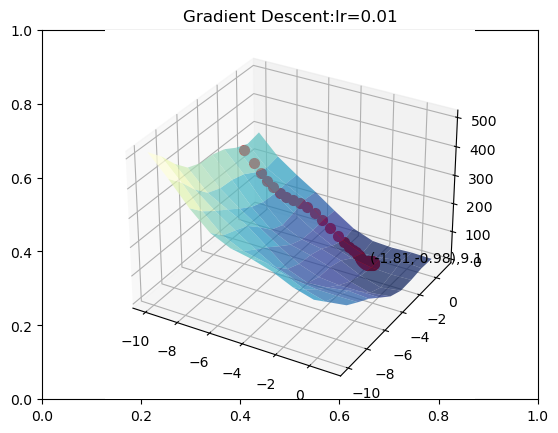

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import random

##### To be Updated #####
# e.g., if your BITS email id is 023ab12345@wilp.bits-pilani.com 
# update the below line as student_id = "023xx12345"
student_id = "023xx04247"
#########################

student_id = ''.join([i for i in student_id if i.isdigit()])
random.seed(student_id)

# set the number of iterations and learning rate
iters = random.randint(100, 300)
learning_rate = 0.01

# Evaluate the function at x
def C(x):
    ##### To be Updated #####
    # Evaluate the new loss function L = 3*x^2 + 2*y^2 + 20*cos(x)*cos(y)
    return 3 * x[0][0]**2 + 2 * x[1][0]**2 + 20 * np.cos(x[0][0]) * np.cos(x[1][0])
    #########################

# Evaluate the gradient of function at x
def dC(x):
    ##### To be Updated #####
    # Compute and return the gradient of the new loss function
    grad_x = 6 * x[0][0] - 20 * np.sin(x[0][0]) * np.cos(x[1][0])
    grad_y = 4 * x[1][0] + 20 * np.sin(x[1][0]) * np.cos(x[0][0])
    return np.array([[grad_x], [grad_y]])
    #########################

def plot_grad_change(X, Y, Z, c, grad_xs0, grad_xs1, grad_ys):
    fig = plt.figure()
    title_str = "Gradient Descent:" + "lr=" + str(learning_rate)
    plt.title(title_str)
    ax = fig.add_subplot(projection='3d')

    ax.plot_surface(X, Y, Z, cmap=plt.cm.YlGnBu_r, alpha=0.7)
    for i in range(len(grad_xs0)):
        ax.plot([grad_xs0[i]], [grad_xs1[i]], [grad_ys[i]], markerfacecolor='r', markeredgecolor='r', marker='o', markersize=7)
    ax.text(grad_xs0[-1], grad_xs1[-1], grad_ys[-1],
            "(" + str(round(grad_xs0[-1], 2)) + "," +
            str(round(grad_xs1[-1], 2)) + ")," +
            str(round(grad_ys[-1], 2)))
    plt.show()

def GD(start, x, y, z, c, dc, iters, eta):
    px = start.astype(float)
    py = c(px).astype(float)
    print("GD Start Point:", px, py)
    print("Num steps:", iters)
    grad_xs0, grad_xs1, grad_ys = [px[0][0]], [px[1][0]], [py]

    for iter in range(iters):
        ##### To be Updated #####
        # Update px using gradient descent
        px = px - eta * dc(px)
        # Update py
        py = c(px)
        #########################
        grad_xs0.append(px[0][0])
        grad_xs1.append(px[1][0])
        grad_ys.append(py)
    print("Converged Point:", px, py)
    plot_grad_change(x, y, z, c, grad_xs0, grad_xs1, grad_ys)


lo = -10
hi = 10
x1 = round(random.uniform(lo, 0), 4)
x2 = round(random.uniform(lo, 0), 4)
x = np.linspace(lo, 1, hi)
y = np.linspace(lo, 1, hi)
X, Y = np.meshgrid(x, y)
Z = np.zeros_like(X)
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        Z[i][j] = C(np.array([X[i][j], Y[i][j]]).reshape(2, 1))
# start Gradient Descent
GD(np.array([x1, x2]).reshape(2, 1), X, Y, Z, C, dC, iters, learning_rate)